https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

### ***About Dataset***

**Context** <br>

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

**Content** <br>

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories: ​Immunization related factors, Mortality factors, Economical factors and Social factors.

**Acknowledgements** <br>

The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

**Inspiration** <br>

*The data-set aims to answer the following key questions:*
1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on life Expectancy?

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

### **Importing**, **cleaning** and **modeling**

In [213]:
df = pd.read_csv('./data/Life Expectancy Data.csv')
df.columns = [col.strip().replace('  ', ' ') for col in df.columns]
df = df.dropna(subset='Life expectancy').sort_values(by=['Country','Year'])

# dados de continente e subcontinente tirados da API: https://restcountries.com/v3.1/name/{country}
df_country_region = pd.read_csv('./data/region_subregion_all_countries.csv')
df = pd.merge(df, df_country_region, on='Country', how='left')

# de acordo com o próprio WHO, os dados de população estam errados ~https://data.who.int/countries/
# dados corretos foram tirados das APIs: https://restcountries.com/v3.1/name/{country}, "http://api.worldbank.org/v2/country/{country}/indicator/SP.POP.TOTL" 
df = pd.merge(df.drop('Population', axis=1), pd.read_csv('./data/population_2000_2015_all_countries.csv'), on=['Country','Year'], how='left')
df['Population'] = df['Population']*10**6

... # para as colunas "a cada 1k pessoas", se valor > 1k ~> valor = nulo

# fillna com a mediana dado mesmo ano e região ~ a ideia é que o valor perdido (nulo) seja parecido com os valores do mesmo ano e da mesma região.
for col in ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']:
    for i in df[df[col].isna()].index:
        region = df.loc[i, 'region']
        year = df.loc[i, 'Year']

        values_region_year = df[(df['region'] == region) & (df['Year']==year) & (df[col].notna())][col]
        if not values_region_year.shape[0]:
            values_region_year = df[(df['region'] == region) & (df['Year']>=year-1) & (df['Year']<=year+1) & (df[col].notna())][col]
            
        df.loc[i, col] = values_region_year.median()


display(df)
display(df.sample().iloc[0])

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Unnamed: 0,region,subregion,Population
0,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,0.1,114.560000,2.3,2.5,0.338,5.5,0,Asia,Southern Asia,20130000.0
1,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,0.1,117.496980,2.1,2.4,0.340,5.9,0,Asia,Southern Asia,20280000.0
2,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,0.1,187.845950,19.9,2.2,0.341,6.2,0,Asia,Southern Asia,21380000.0
3,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,0.1,198.728544,19.7,19.9,0.373,6.5,0,Asia,Southern Asia,22730000.0
4,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,...,0.1,219.141353,19.5,19.7,0.381,6.8,0,Asia,Southern Asia,23560000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,13.3,839.927936,6.8,6.7,0.452,10.1,182,Africa,Southern Africa,13600000.0
2924,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,8.8,955.648466,6.5,6.4,0.464,9.8,182,Africa,Southern Africa,13820000.0
2925,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,6.8,111.227396,6.2,6.0,0.488,10.4,182,Africa,Southern Africa,14010000.0
2926,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,6.3,127.474620,5.9,5.7,0.498,10.3,182,Africa,Southern Africa,14210000.0


Country                                  Kuwait
Year                                       2007
Status                               Developing
Life expectancy                            73.7
Adult Mortality                            89.0
infant deaths                                 1
Alcohol                                    0.03
percentage expenditure              2555.303869
Hepatitis B                                99.0
Measles                                       0
BMI                                        67.1
under-five deaths                             1
Polio                                      99.0
Total expenditure                          2.13
Diphtheria                                 99.0
HIV/AIDS                                    0.1
GDP                                 45793.97614
thinness 1-19 years                         3.2
thinness 5-9 years                          3.1
Income composition of resources           0.787
Schooling                               

### **EDA**

In [214]:
print(df.shape)
display(
    pd.DataFrame({
        'Tipo': df.dtypes,
        'Qtde nulos': df.isnull().sum(),
        'Proporção nulos': df.isnull().mean(),
        'Qtde unicos': df.nunique(),
        'Exemplo unicos': df.apply(lambda x: x.unique()[:3])
    })
)

display(df.describe())

(2928, 25)


,Tipo,Qtde nulos,Proporção nulos,Qtde unicos,Exemplo unicos
Country,object,0,0.0,183,"[Afghanistan, Albania, Algeria]"
Year,int64,0,0.0,16,"[2000, 2001, 2002]"
Status,object,0,0.0,2,"[Developing, Developed]"
Life expectancy,float64,0,0.0,362,"[54.8, 55.3, 56.2]"
Adult Mortality,float64,0,0.0,425,"[321.0, 316.0, 3.0]"
infant deaths,int64,0,0.0,209,"[88, 87, 85]"
Alcohol,float64,0,0.0,1077,"[0.01, 0.02, 0.03]"
percentage expenditure,float64,0,0.0,2323,"[10.42496, 10.5747282, 16.88735091]"
Hepatitis B,float64,0,0.0,96,"[62.0, 63.0, 64.0]"
Measles,int64,0,0.0,958,"[6532, 8762, 2486]"


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Unnamed: 0,Population
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,...,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03
mean,2007.50000,69.224932,164.796448,30.407445,4.514810,740.321185,82.394980,2427.855874,38.042657,42.179303,...,5.940331,82.326673,1.747712,6817.864517,4.879337,4.908811,0.627663,12.002391,91.000000,3.657920e+07
std,4.61056,9.523867,124.292079,118.114450,4.009847,1990.930605,22.869488,11485.970937,19.936234,160.700547,...,2.409215,23.650226,5.085542,13310.302935,4.405439,4.492878,0.208368,3.305709,52.835784,1.371552e+08
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000,0.000000,5.000000e+04
25%,2003.75000,63.100000,74.000000,0.000000,0.867500,4.853964,81.000000,0.000000,19.200000,0.000000,...,4.360000,78.000000,0.100000,517.856585,1.600000,1.600000,0.491000,10.100000,45.000000,2.110000e+06
50%,2007.50000,72.100000,144.000000,3.000000,3.675000,65.611455,91.000000,17.000000,43.000000,4.000000,...,5.760000,93.000000,0.100000,1820.702189,3.400000,3.400000,0.677000,12.300000,91.000000,8.160000e+06
75%,2011.25000,75.700000,228.000000,22.000000,7.490000,442.614322,96.000000,362.250000,56.100000,28.000000,...,7.452500,97.000000,0.800000,5475.094150,7.200000,7.300000,0.780000,14.300000,137.000000,2.509250e+07
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,...,17.600000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000,182.000000,1.388000e+09


#### *Univariate* Analysis

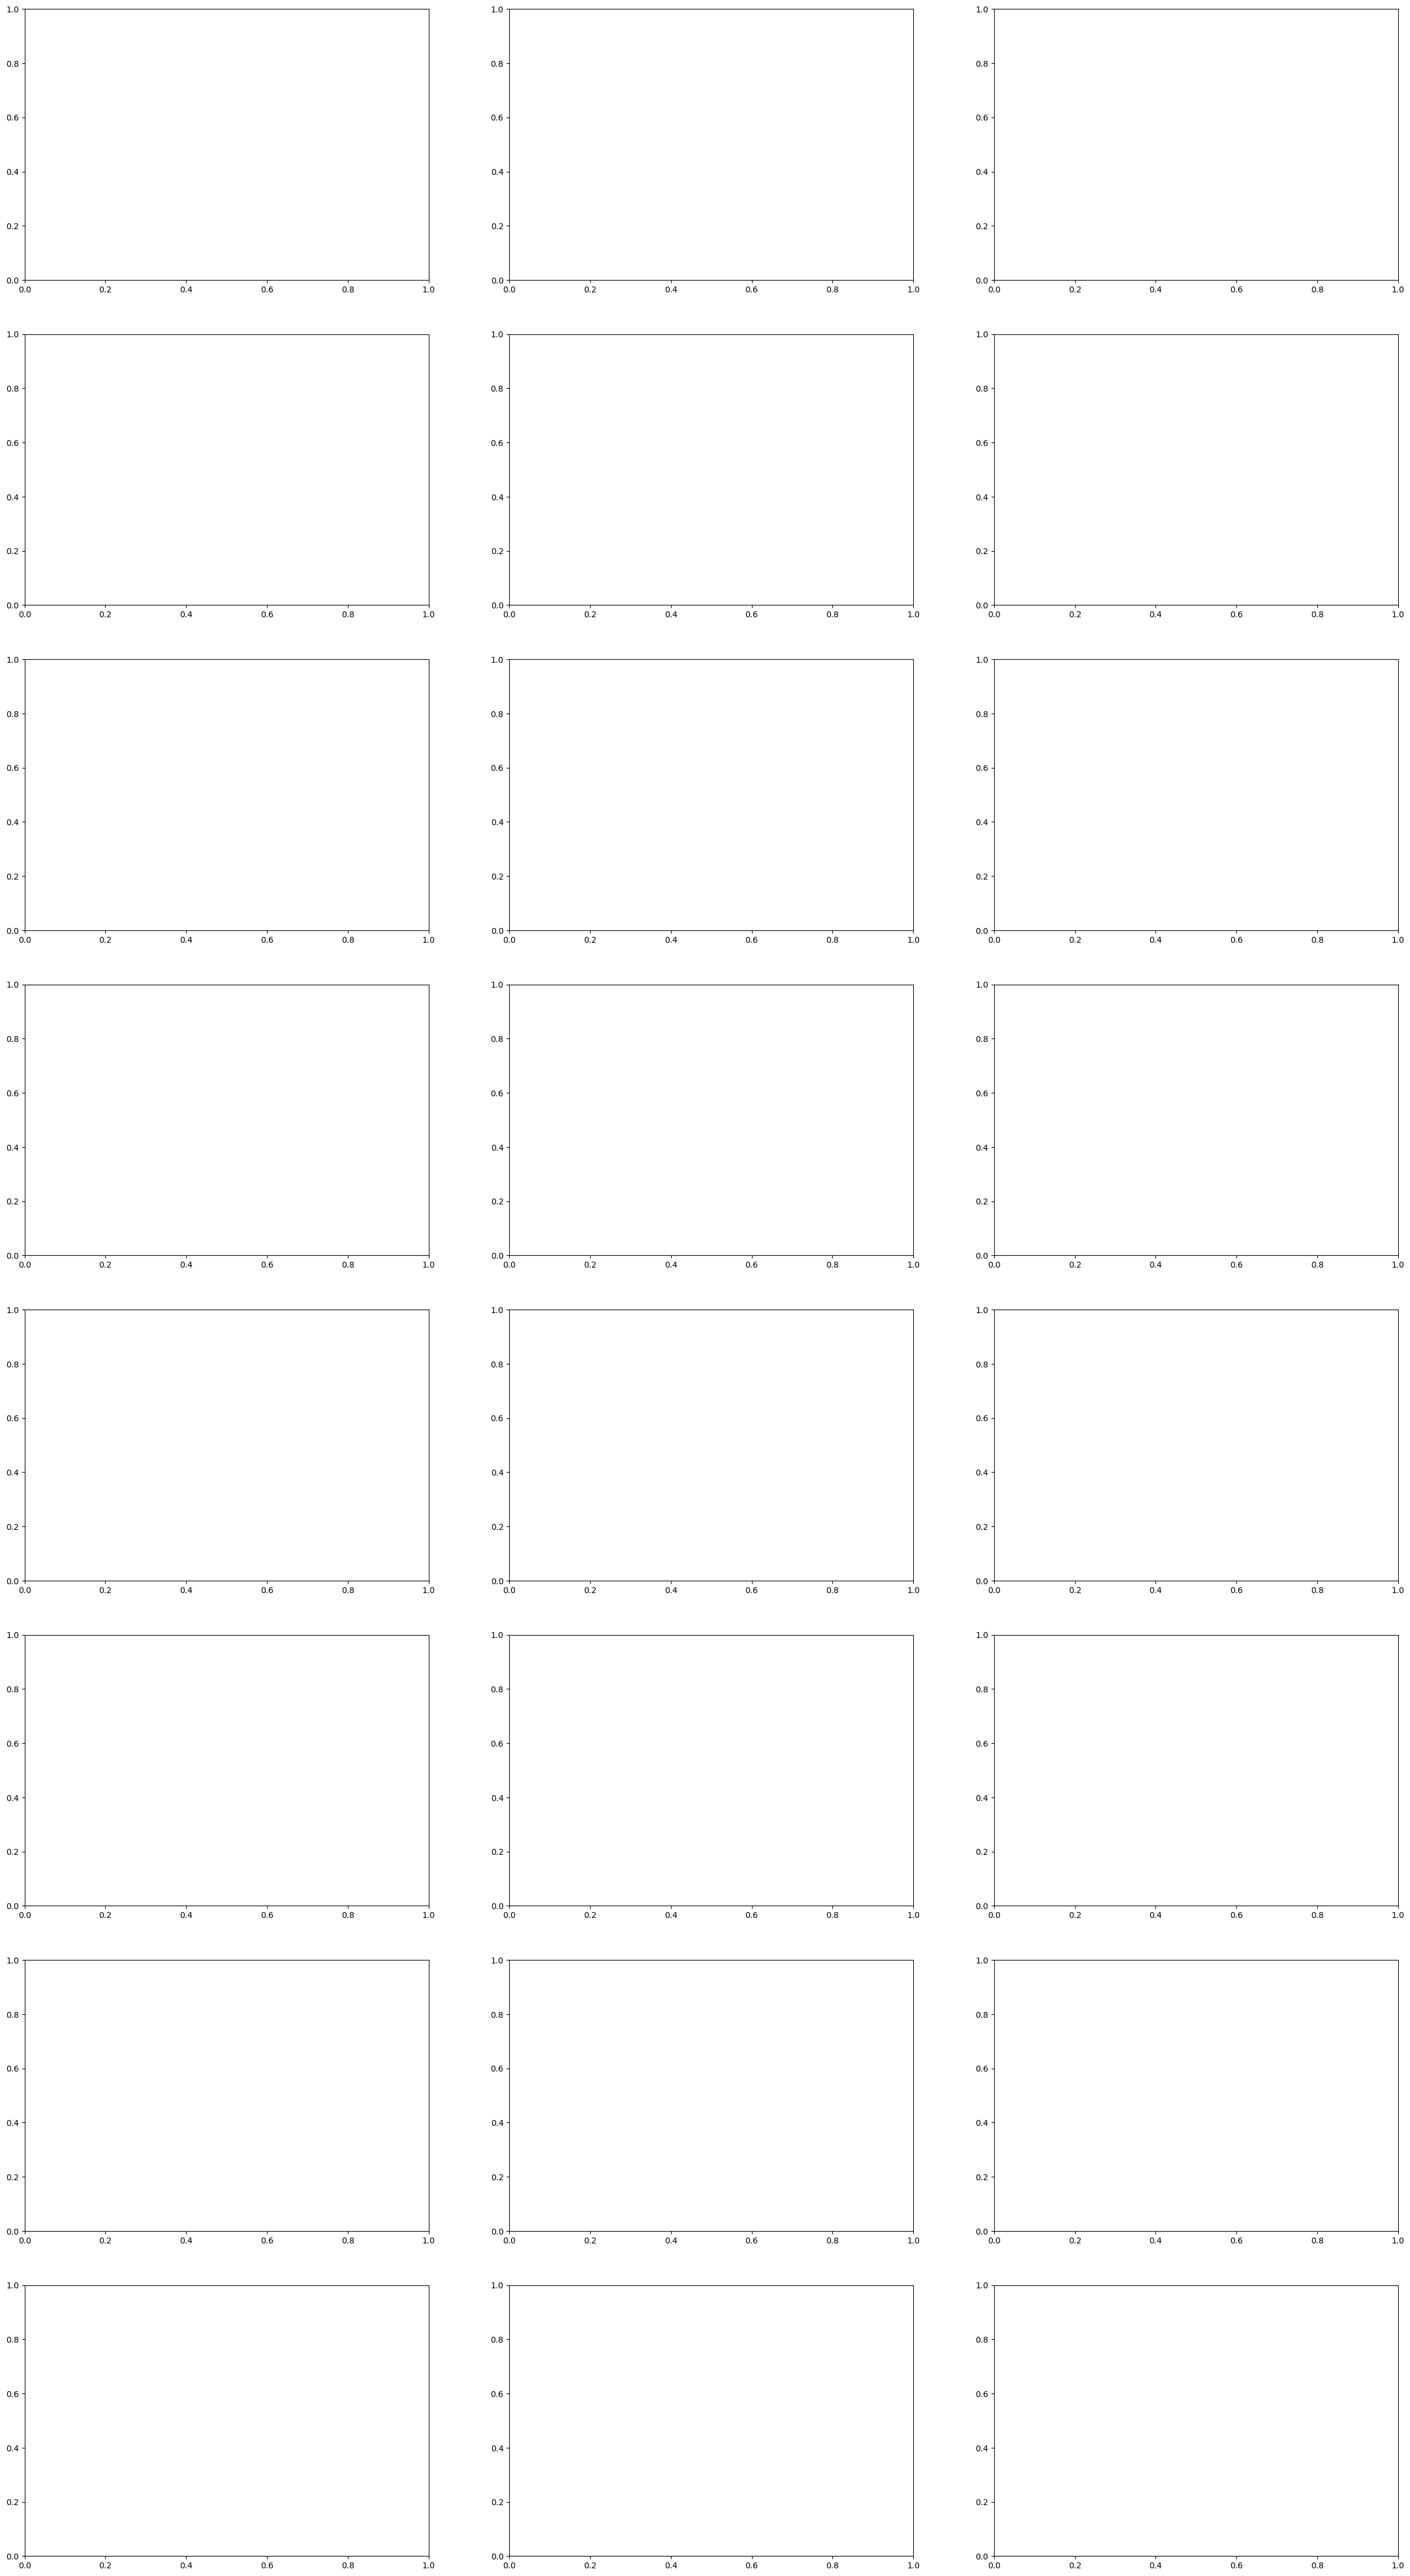

In [215]:
fig, axs = plt.subplots(8, 3, figsize=(30, 7*8))

...


plt.show()